<a href="https://colab.research.google.com/github/AlexTran448/BiologyNotebooks/blob/main/fisher_wright.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [ ]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

def infinite_fisher_wright(s: float, m: float, n: float, T: int, x0: float =0):
  '''
  x0 : initial mutants
  s : selective advantage of mutaunt
  m : mutation probability
  n : normalisation probability
  T : generations
  '''
  arr = range(T + 1)
  dp_dt = lambda x,t : (x * (s - n - m - (n * s)) + m - s * (x ** 2)) / (1 + s * x)
  mut_arr = odeint(dp_dt, x0, arr)

  return arr, mut_arr


def finite_fisher_wright(N: int, s: float, m: float, n: float, T: float, x: int = 0):
  '''
  N: population size
  x0: initial mutants
  s : selective advantage of mutaunt
  m : mutation probability
  n : normalisation probability
  T : generations
  '''
  arr = range(T)
  mut_arr = [0] * T
  for t in range(T):
    psm = (((1-n) * (1+s) * x) + (m * (N - x)) ) / (N + s * x)
    x = np.random.binomial(N, psm)
    mut_arr[t] = x
  return arr, mut_arr


def fisher_wright(N, s, m, n, T, x=0, show=True):
  if N == 'Inf':
    x,y = infinite_fisher_wright(s,m,n,T,x0=x)
    l = 'Infinite'
  else:
    x,y = finite_fisher_wright(N, s, m, n, T, x=x)
    l = 'Finite'
  if show:
    line, = plt.plot(x,y)
    plt.title(f'N = {N}, s = {s}, m = {m}, n={n}')
    plt.xlabel ('Generations, $t$')
    plt.ylabel('$x$')
    plt.legend([l], loc='upper left')
    plt.show()
  else:
    return x,y

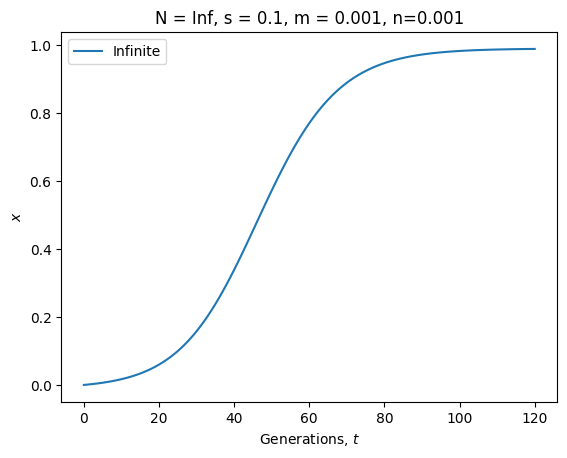

In [ ]:
fisher_wright('Inf', 0.1, 0.001, 0.001, 120)

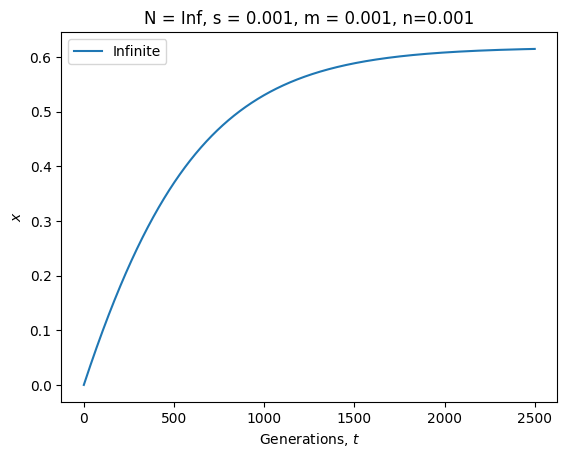

In [ ]:
fisher_wright('Inf', 0.001, 0.001, 0.001, 2500)

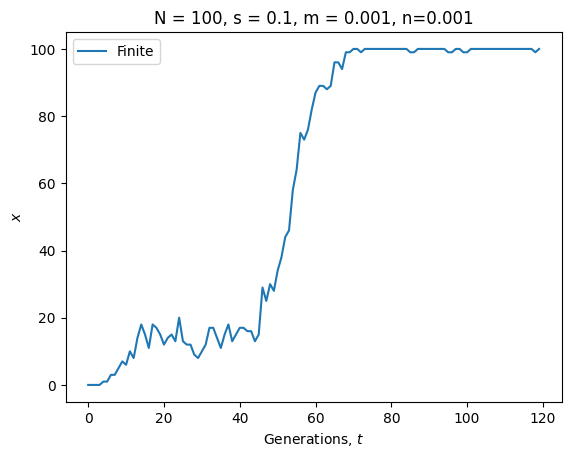

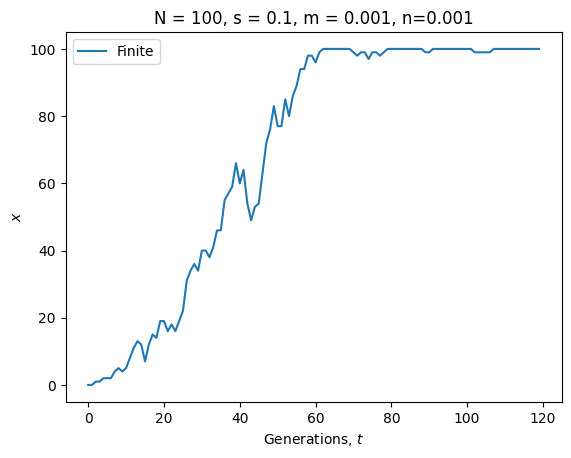

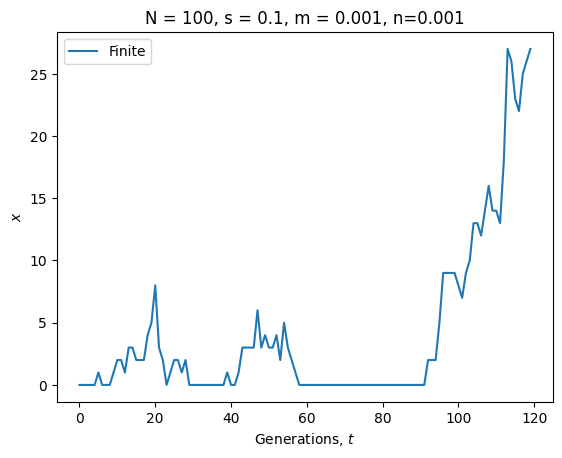

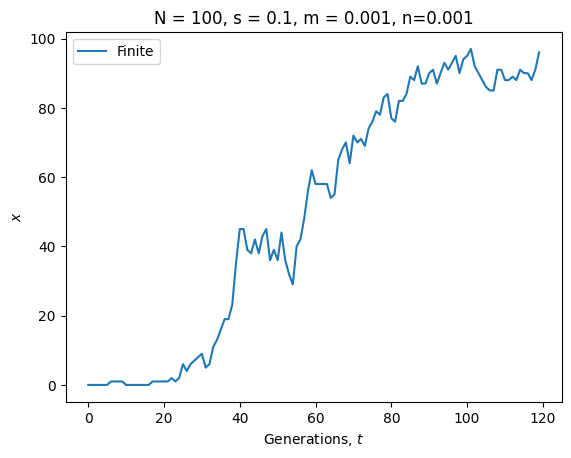

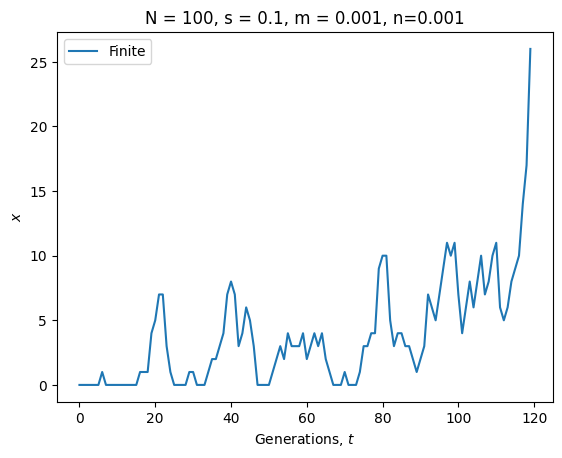

In [ ]:
for _ in range(5):
  fisher_wright(100, 0.1, 0.001, 0.001, 120)

They roughly follow the shape to the infinite FW model, but the population is different every time.
Ocassionally, advantagous mutation is unable to gain enough population to take over within 120 generations. (Ends up iterating between 0 and small number).
After a certain threshold, the population of $x$ mutants. keeps is very likely to continue increasing

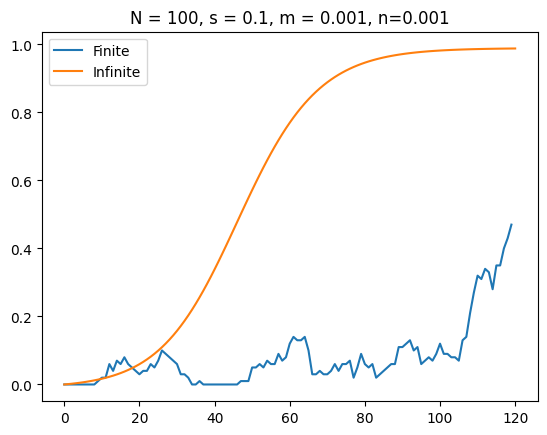

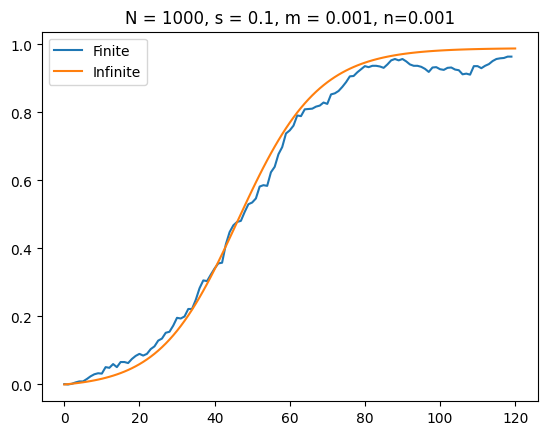

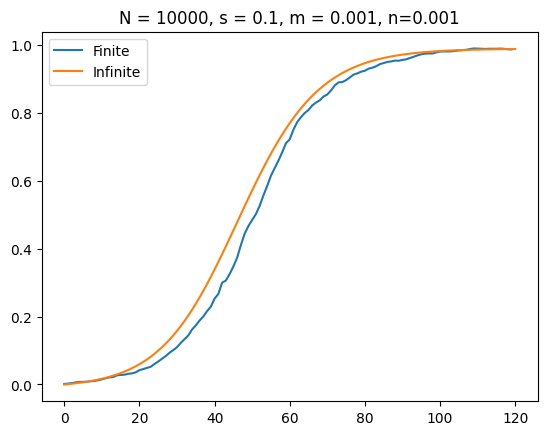

In [ ]:
N = 'Inf'
s = 0.1
m = 0.001
n = 0.001
T = 120

x_inf , y_inf = fisher_wright(N, 0.1, m, n, 120, show=False)
x_fin = range(T)
N = 100
_, y_100 = fisher_wright(N, 0.1, m, n, 120, show=False)
plt.plot(x_fin, list(map(lambda x: x / N, y_100)))
plt.plot(x_inf, y_inf)
plt.title(f'N = {N}, s = {s}, m = {m}, n={n}')
plt.legend(['Finite', 'Infinite'], loc='upper left')
plt.show()

N = 1000
_, y_100 = fisher_wright(N, 0.1, m, n, 120, show=False)
plt.plot(x_fin, list(map(lambda x: x / N, y_100)))
plt.plot(x_inf, y_inf)
plt.title(f'N = {N}, s = {s}, m = {m}, n={n}')
plt.legend(['Finite', 'Infinite'], loc='upper left')
plt.show()

N = 10_000
_, y_100 = fisher_wright(N, 0.1, m, n, 120, show=False)
plt.plot(x_fin, list(map(lambda x: x / N, y_100)))
plt.plot(x_inf, y_inf)
plt.title(f'N = {N}, s = {s}, m = {m}, n={n}')
plt.legend(['Finite', 'Infinite'], loc='upper left')
plt.show()

As N increases, the closer / more likely the finite model is to follow the infinite model

In [ ]:
def average_fisher_wright(I, N, s, m, n, T, x=0, show=True):

  x = range(T)
  Y = []
  for i in range(I):
    _,y = fisher_wright(N, s, m, n, T, show = False)
    Y.append(y)

  for y in Y:
    plt.plot(x,y, alpha=0.2, color='green')

  x_inf, y_inf = infinite_fisher_wright(s, m, n, T)
  if show:
    avg = np.mean(Y, axis=0)
    plt.plot(x,avg, label='Average')
    plt.plot(x_inf, y_inf * N, label='Normalised infinite')
    plt.title(f'N = {N}, s = {s}, m = {m}, n={n}')
    plt.legend()
    plt.xlabel ('Generations, $t$')
    plt.ylabel('$x$')
    plt.show()


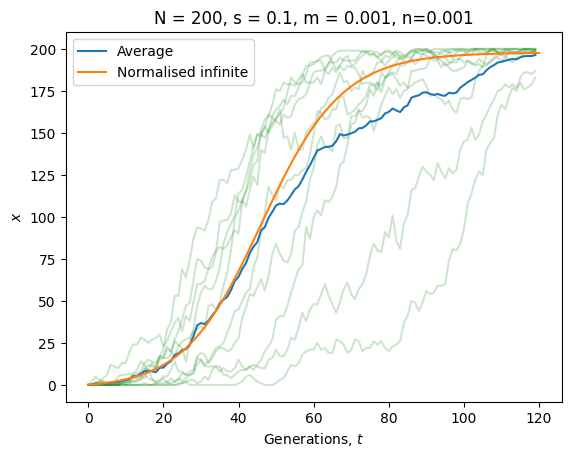

In [ ]:
average_fisher_wright( 10, 200, 0.1, 0.001, 0.001, 120)

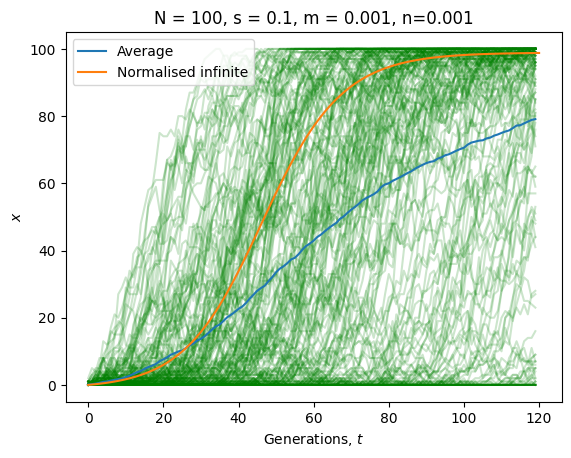

In [ ]:
average_fisher_wright(200, 100, 0.1, 0.001, 0.001, 120)

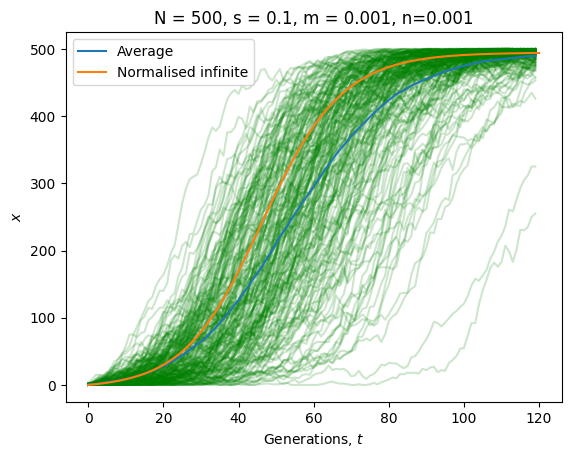

In [ ]:
average_fisher_wright(200, 500, 0.1, 0.001, 0.001, 120)

The average follows the infinite model when N is large enough.
If N is too small, it does not follow the infinite model.

In [ ]:
def takeover_fisher_wright(N: int, s: float, m: float, n: float, x=0):
  '''
  N: population size
  x0: initial mutants
  s : selective advantage of mutaunt
  m : mutation probability
  n : normalisation probability
  T : generations
  '''
  T = 0
  while True:
    psm = (((1-n) * (1+s) * x) + (m * (N - x)) ) / (N + s * x)
    x = np.random.binomial(N, psm)
    T += 1
    if x/N > 0.95:
      return T
  return arr, mut_arr

def takeover_average_fisher_wright(I, N, s, m, n, x=0):

  x = range(T)
  Y = []
  for i in range(I):
    t = takeover_fisher_wright(N, s, m, n)
  avg = np.mean(t)
  return avg

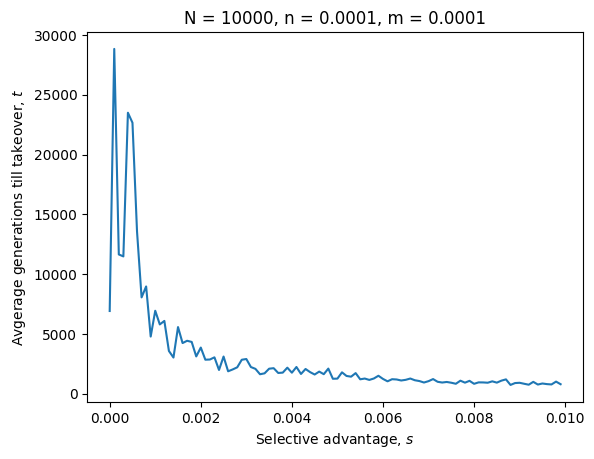

In [ ]:
I = 50
N = 10000
n = m = 0.0001
s = np.arange(0,0.01,0.0001)

takeout = []
for _s in s:
  y = takeover_average_fisher_wright(I, N, _s, m, n)
  takeout.append(y)

plt.plot(s, takeout)
plt.title(f'N = {N}, n = {n}, m = {m}')
plt.xlabel('Selective advantage, $s$')
plt.ylabel('Avgerage generations till takeover, $t$')
plt.show()

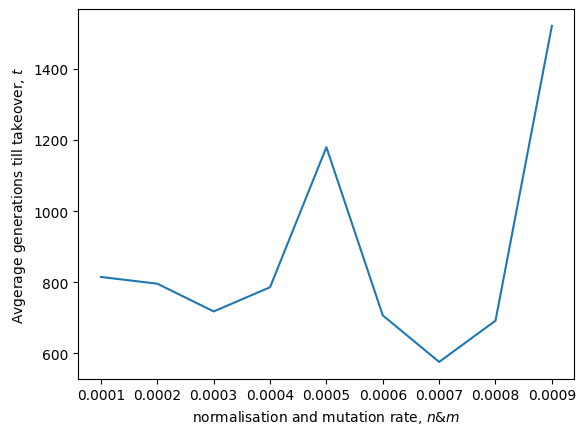

In [ ]:
I = 1000
N = 10000
nm = np.arange(0.0001, 0.001, 0.0001)
s = 0.01

takeout = []
for _nm in nm:
  y = takeover_average_fisher_wright(I, N, s, _nm, _nm)
  takeout.append(y)

plt.plot(nm, takeout)
plt.xlabel('normalisation and mutation rate, $n & m$')
plt.ylabel('Avgerage generations till takeover, $t$')
plt.show()

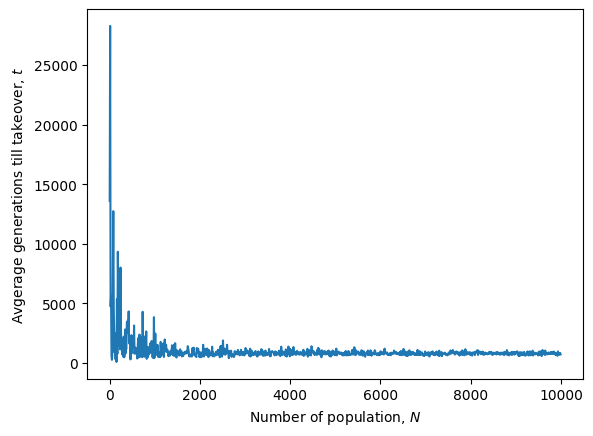

In [ ]:
I = 500
N = range(1, 10_000, 10)
n = m = 0.0001
s = 0.01

takeout = []
for _N in N:
  y = takeover_average_fisher_wright(I, _N, s, n, m)
  takeout.append(y)

plt.plot(N, takeout)
plt.xlabel('Number of population, $N$')
plt.ylabel('Avgerage generations till takeover, $t$')
plt.show()

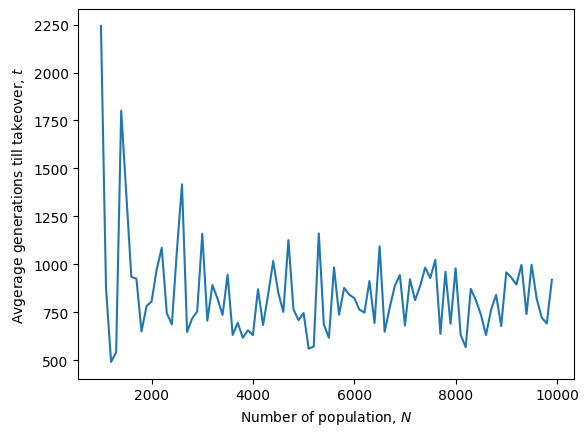

In [ ]:
I = 50
N = range(1000, 10_000, 100)
n = m = 0.0001
s = 0.01

takeout = []
for _N in N:
  y = takeover_average_fisher_wright(I, _N, s, n, m)
  takeout.append(y)

plt.plot(N, takeout)
plt.xlabel('Number of population, $N$')
plt.ylabel('Avgerage generations till takeover, $t$')
plt.show()

# Part 2

In [ ]:
# Create transition Matrix W
from scipy.special import comb
def transition_matrix(N: int, s: float, m: float, n: float) -> np.ndarray:
  W = np.zeros((N+1, N+1))
  for x in range(N + 1):
    for x_prime in range (N + 1):
      psm = lambda x : (((1 - n) * (1 + s) * x)+ (m * (N - x))) / (N + s * x)
      W[x, x_prime] = comb(N, x_prime) * (psm(x) ** x_prime) * ((1 - psm(x)) ** (N - x_prime))
  return W

In [ ]:
# Check if columns are equal to 1
N = 100
s = 0.2
m = 0.005
n = 0.005
W = transition_matrix(100, 0.2, 0.005, 0.005)
print(f'Columns sum to 1: {np.allclose(np.sum(W, axis=1), 1)}')

Columns sum to 1: True


In [ ]:
# Compute probabilities at time T
def markov_model(t: int, N: int, s: float, m: float, n: float, show=True,p_max=0.2, t0 = None):
  if t0 is None:
    t0 = np.zeros(N+1)
    t0[0] = 1

  x = range(N + 1)

  W = transition_matrix(N,s,m,n)
  Wn = np.linalg.matrix_power(W,t + 1)
  y = np.dot(t0, Wn)
  if show:
    plt.plot(x,y)
    plt.xlim([0, N])
    plt.ylim([0, p_max])
    plt.title(f't = {t}, N = {N}, s = {s}, m = {m}, n = {n}')
    plt.xlabel('Number of mutants')
    plt.ylabel('$p_x$')
    plt.show()
  return x,y

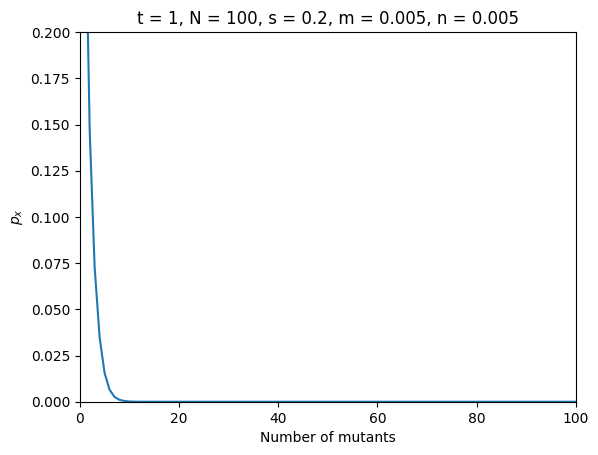

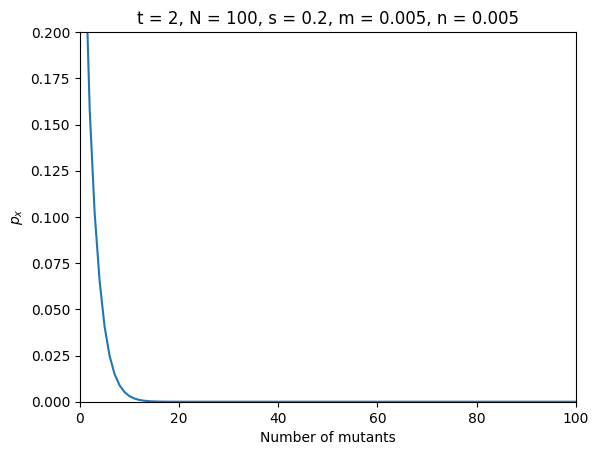

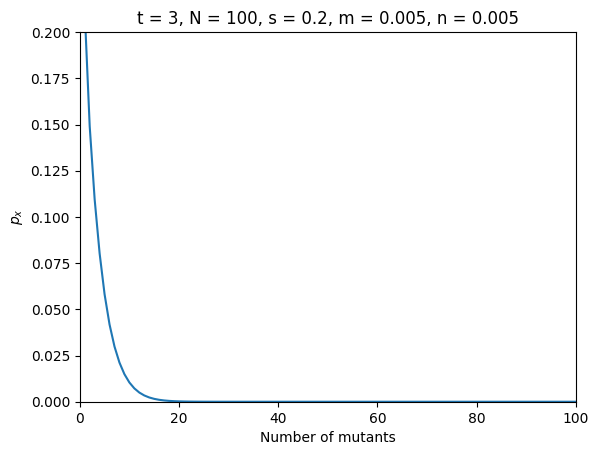

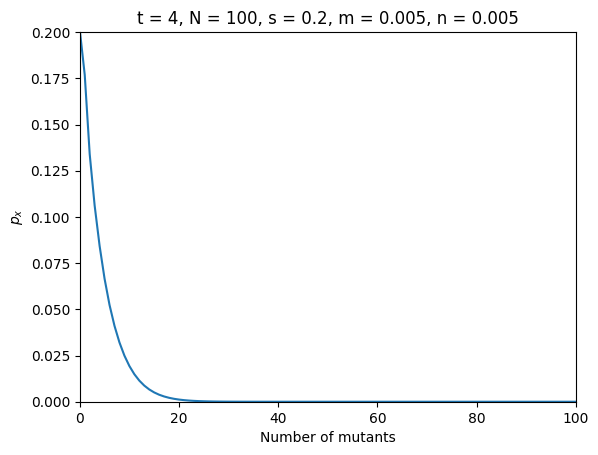

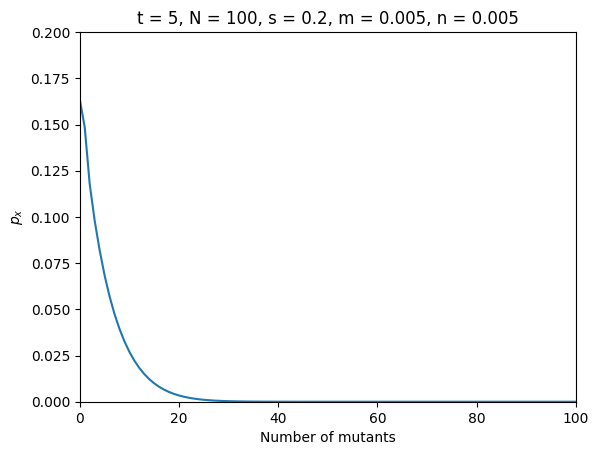

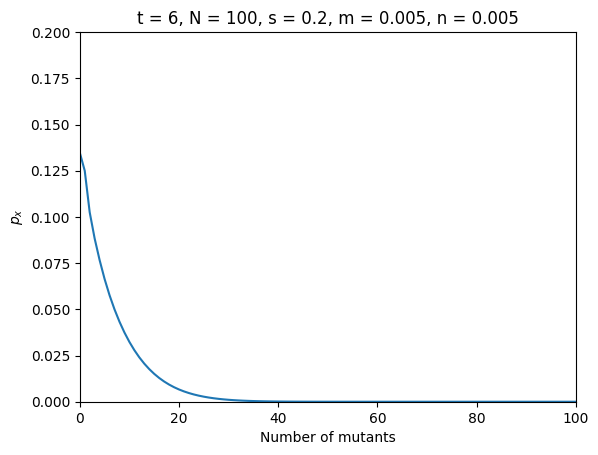

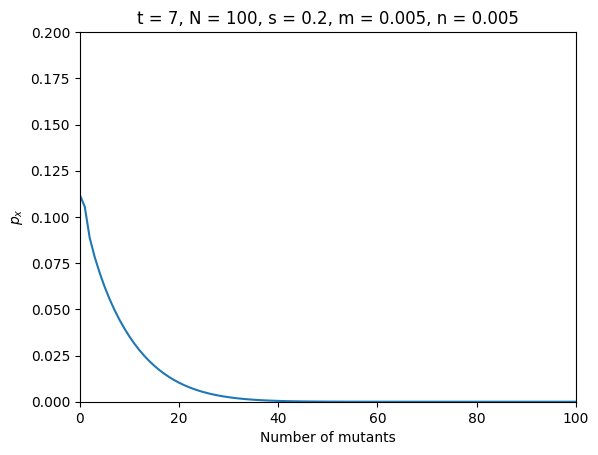

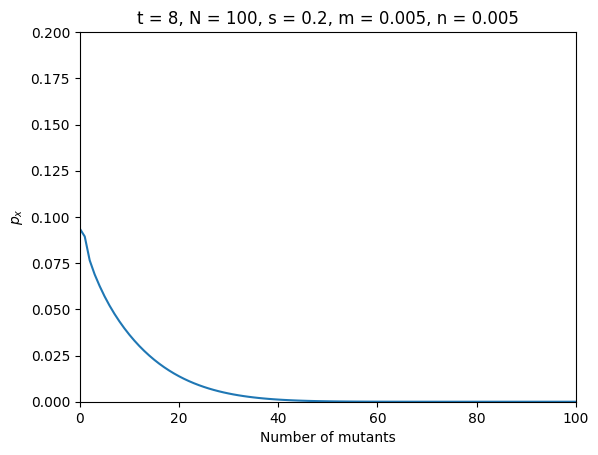

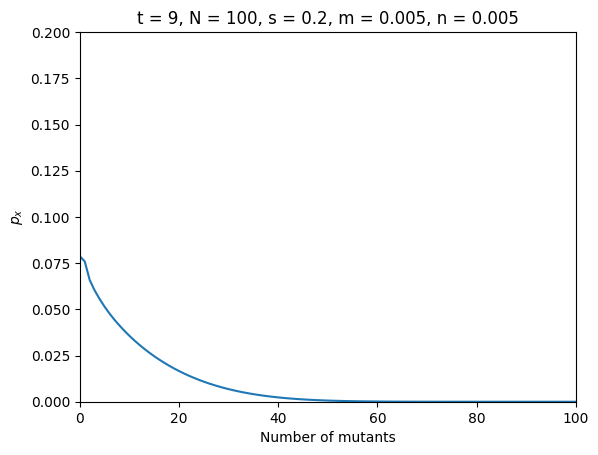

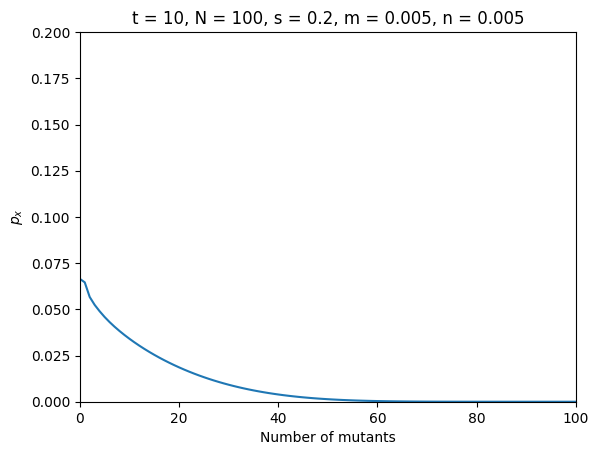

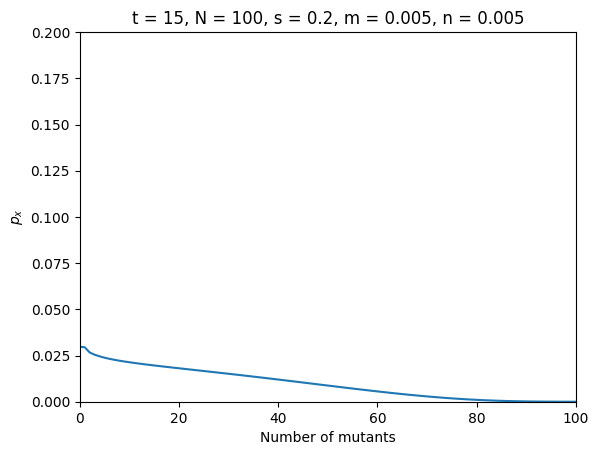

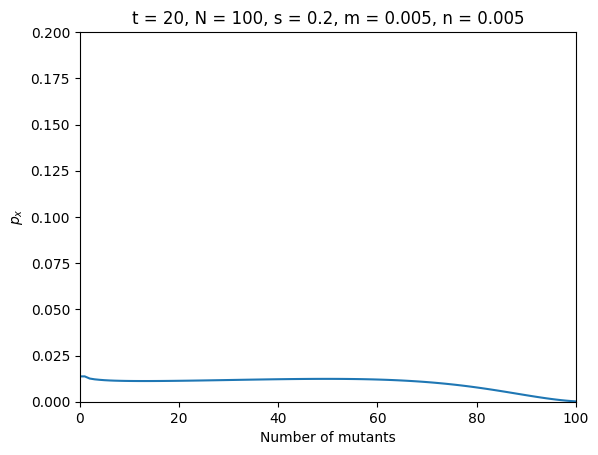

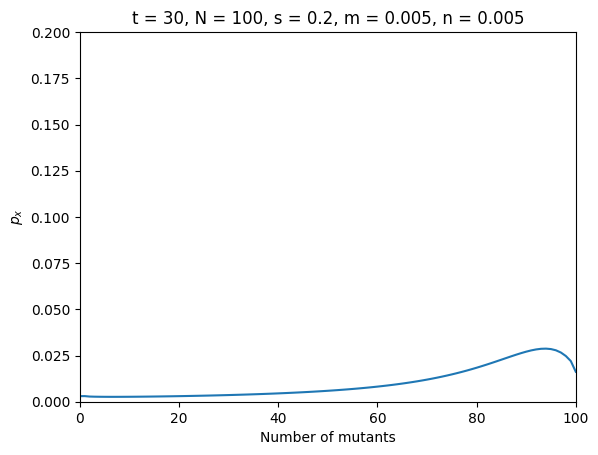

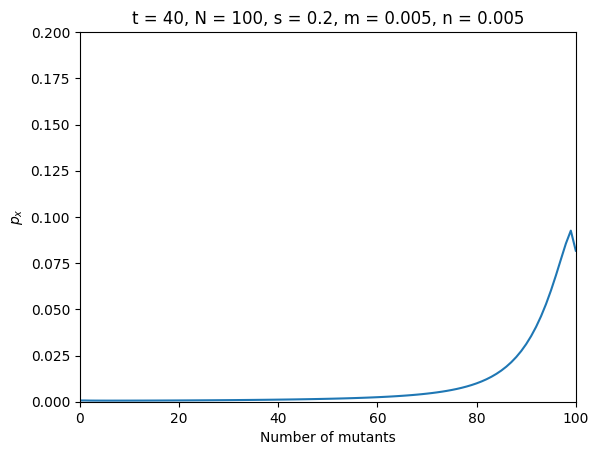

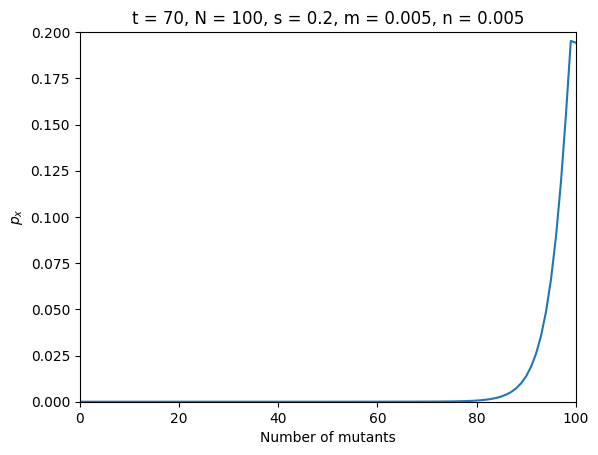

In [ ]:
T = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,70]
for t in T:
  x,y = markov_model(t, 100, 0.2, 0.005, 0.005)

Markov models matches those in the slide

In [ ]:
def average_over_generation(N, s, n, m, T, show=True, step=1):
  x = range(0, T + 1, step)
  y = []
  _y = np.zeros(N + 1)
  _y[0] = 1
  for t in x:
    _x,_y = markov_model(step, N, s, n, m, show=False, t0=_y)
    expected = np.sum(_x * _y)
    y.append(expected)
  if show:
    plt.plot(x,y)
    plt.title(f'N = {N}, s = {s}, n = {n}, m = {m}')
    plt.xlabel('Generation')
    plt.ylabel('$x$')
    plt.show()
  return x,y

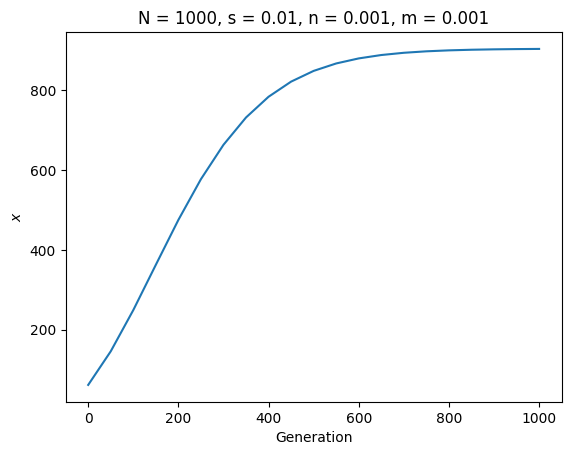

(range(0, 1001, 50),
 [61.69673737380054,
  145.92476293958492,
  249.25387999381718,
  362.7546503006887,
  475.2862912907474,
  577.4122850454203,
  663.554663394844,
  732.0419978822388,
  783.9802285452765,
  821.9175706635942,
  848.8161026816128,
  867.4436633800908,
  880.1048571032354,
  888.584305805902,
  894.1969657176406,
  897.8777154181473,
  900.2738473500922,
  901.8246616424678,
  902.82377327081,
  903.465122642851,
  903.8756442425112])

In [ ]:
average_over_generation(1000, 0.01, 0.001, 0.001, 1000, step=50)

boy does this code take a long time to run

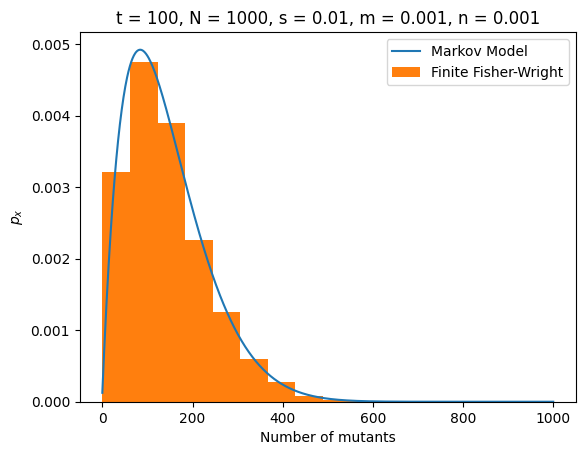

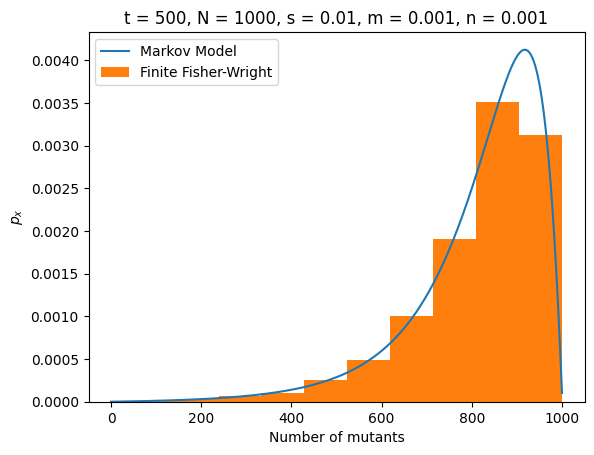

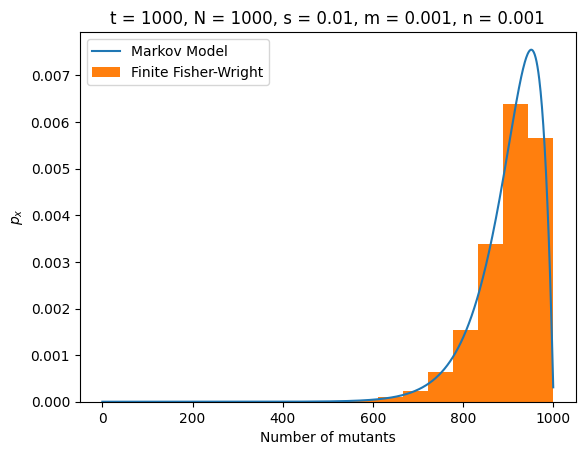

In [ ]:
T = [100, 500, 1000]
N = 1000
s = 0.01
m = 0.001
n = 0.001
for t in T:
  _x, _y = markov_model(t, N, s, m, n, show=False)
  plt.plot(_x,_y, label='Markov Model')
  x = []
  for i in range(10000):
    _, _x = fisher_wright(N, s, m, n, t, show=False)
    x.append(_x[-1])
  plt.hist(x, density = True, label='Finite Fisher-Wright')
  plt.title(f't = {t}, N = {N}, s = {s}, m = {m}, n = {n}')
  plt.xlabel('Number of mutants')
  plt.ylabel('$p_x$')
  plt.legend()
  plt.show()

# Part 3

In [ ]:
def fisher_wright_genome(N, L, s, n, t, show=True):
  pop = np.zeros((N,L), dtype=int)
  x = range(t + 1)
  mut_arr = np.zeros(t+1)

  for m in range(1, t + 1):
    fitness = (1 + s) ** np.sum(pop, axis=1)
    sum_fitness = np.sum(fitness)
    fitness = fitness / sum_fitness

    choices = np.random.choice(len(pop), size=N, p=fitness)
    pop = pop[choices]

    mutate = np.random.choice([0,1], size=(N,L), p=[1-n, n])
    pop = np.bitwise_xor(pop, mutate)

    mut_arr[m] = np.sum(pop) / N

  if show:
    plt.plot(x, mut_arr / L)
    plt.title(f'N = {N}, L = {L}, s = {s}, n = {n}')
    plt.xlabel('Generations, $t$')
    plt.ylabel('Average mutations per site, $m$')
    plt.show()
  return x,mut_arr

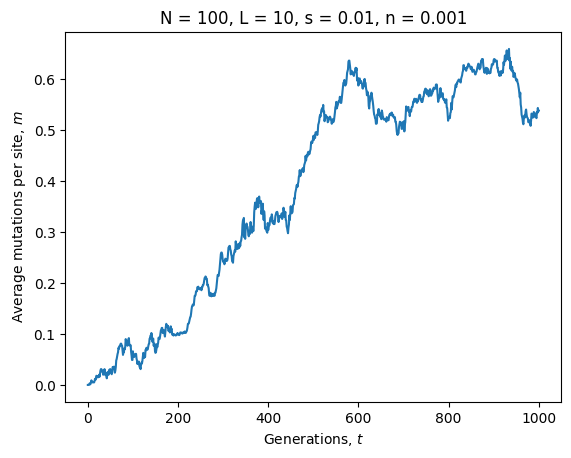

(range(0, 1001), array([0.  , 0.  , 0.  , ..., 5.44, 5.37, 5.39]))

In [ ]:
fisher_wright_genome(100, 10, 0.01, 0.001, 1000)

In [ ]:
def fisher_wright_crossover(N, L, s, n, t, show=True):
  pop = np.zeros((N,L), dtype=int)
  x = range(t + 1)
  mut_arr = np.zeros(t+1)

  for m in range(1, t + 1):
    fitness = (1 + s) ** np.sum(pop, axis=1)
    sum_fitness = np.sum(fitness)
    fitness = fitness / sum_fitness

    choices = np.random.choice(len(pop), size=2*N, p=fitness)
    parents = pop[choices]

    for i in range(0, N):
      parent1 = parents[i]
      parent2 = parents[i + N]
      child = parent1 + parent2
      child[child == 1] = np.random.randint(2, size=np.sum(child == 1))
      child[child == 2] = 1
      pop[i] = child

    mutate = np.random.choice([0,1], size=(N,L), p=[1-n, n])
    pop = np.bitwise_xor(pop, mutate)

    mut_arr[m] = np.sum(pop) / N

  if show:
    plt.plot(x, mut_arr / L)
    plt.title(f'N = {N}, L = {L}, s = {s}, n = {n}')
    plt.xlabel('Generations, $t$')
    plt.ylabel('Average mutations per site, $m$')
    plt.show()
  return x,mut_arr

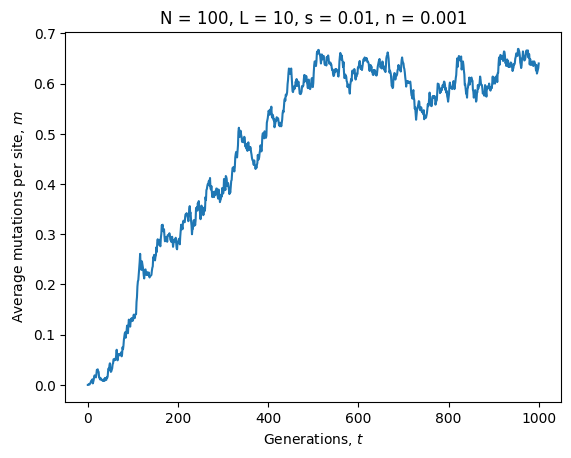

(range(0, 1001), array([0.  , 0.  , 0.01, ..., 6.29, 6.31, 6.4 ]))

In [ ]:
fisher_wright_crossover(100, 10, 0.01, 0.001, 1000)

In [ ]:
def compare(N, L, s, n, t):
  x1, y1 = fisher_wright_genome(N, L, s, n, t, show=False)
  x2, y2 = fisher_wright_crossover(N, L, s, n, t, show=False)
  x3, y3 = average_over_generation(N, s, n, m, t - 1, show=False)
  y3 = np.array(y3)
  plt.plot(x1,y1, label='asexual fisher wright')
  plt.plot(x2,y2, label='sexual fisher wright')
  plt.plot(x3,y3 / N, label='markov model')
  plt.title(f'N = {N}, L = {L}, s = {s}, n = {n}')
  plt.xlabel('Generations, $t$')
  plt.ylabel('Average mutations')
  plt.legend()
  plt.show()

In [ ]:
# Baseline
N = 500
L = 10
s = 0.1
m = n = 0.01
# Only change 1 variable per graph

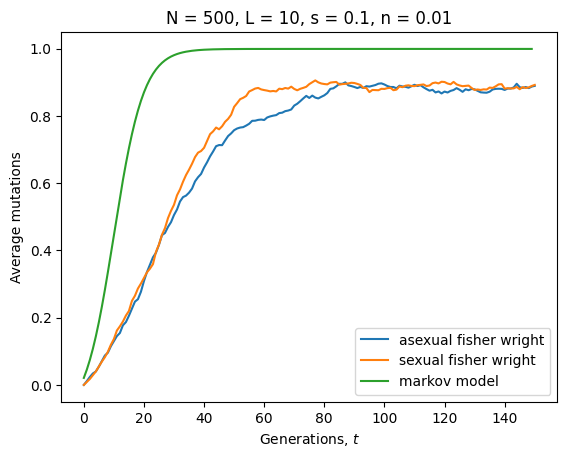

In [ ]:
compare(500, 10, 0.1, 0.01, 150)

The sexual model is a better fit to the markov model than the asexual model

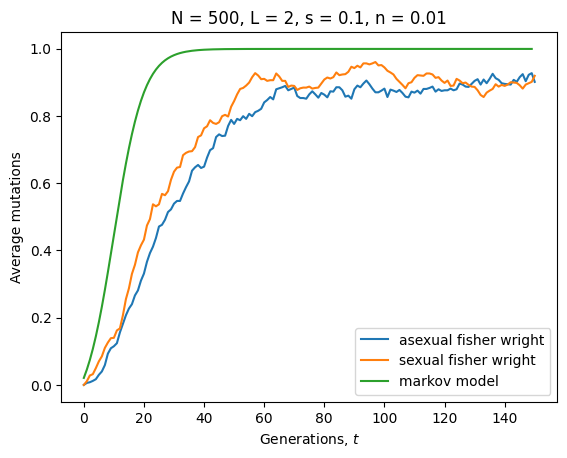

In [ ]:
compare(500, 2, 0.1, 0.01, 150)

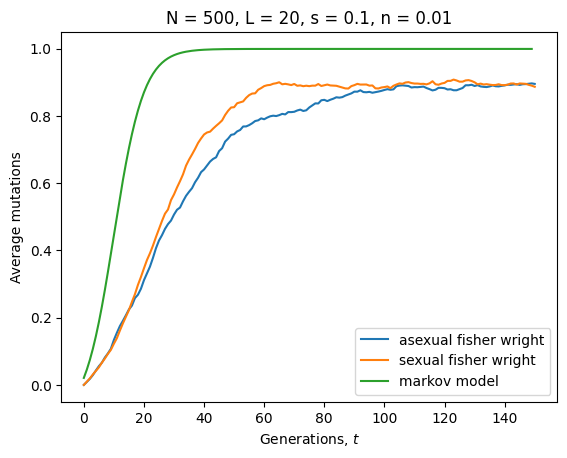

In [ ]:
compare(500, 20, 0.1, 0.01, 150)

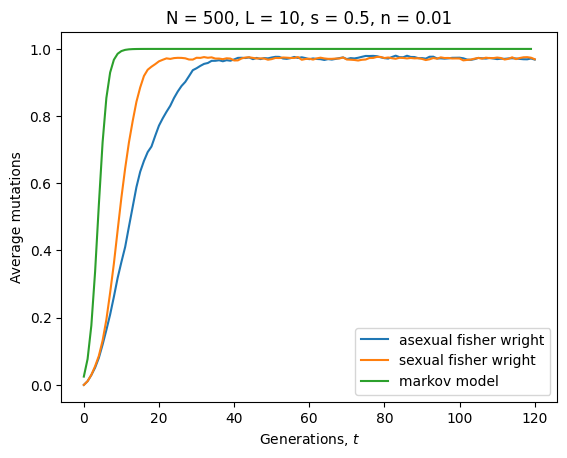

In [ ]:
compare(500, 10, 0.5, 0.01, 120)

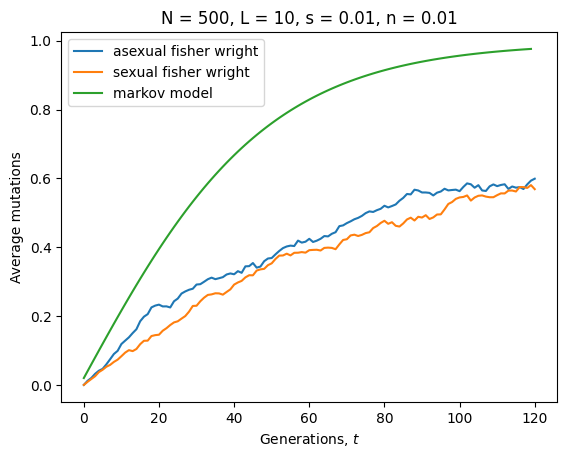

In [ ]:
compare(500, 10, 0.01, 0.01, 120)

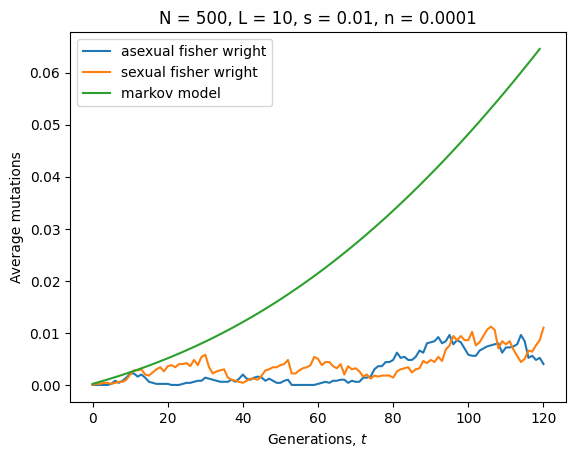

In [ ]:
compare(500, 10, 0.01, 0.0001, 120)

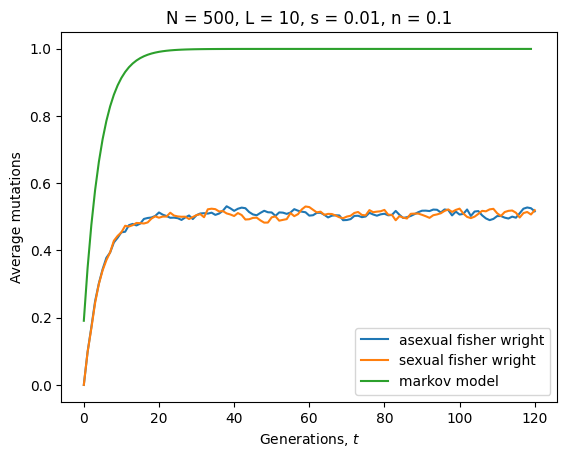

In [ ]:
compare(500, 10, 0.01, 0.1, 120)

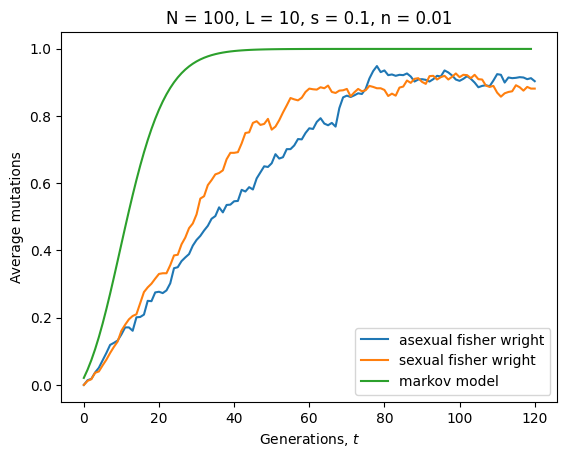

In [ ]:
compare(100, 10, 0.1, 0.01, 120)

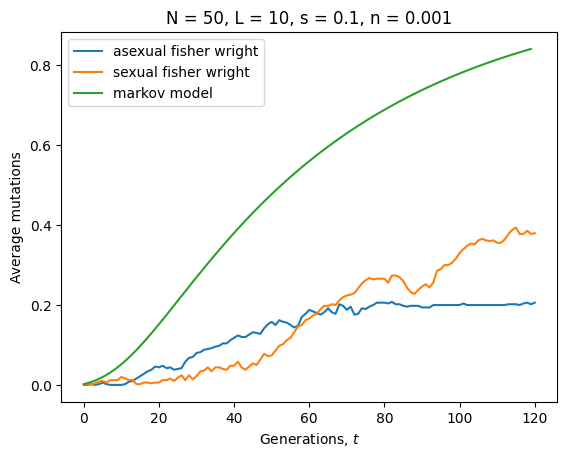

In [ ]:
compare(50, 10, 0.1, 0.001, 120)

Decreasing / increasing genomes roughly have no effect.
Increasing selective advantage makes it more likely to fit the markov model
Reducing the selective advantage increases the fit to the markov model.
The mutation rate increases the likelyhood the model fits closely to the markov model, up to a point then it reduces (as sites approaching 0.5 effectively makes selective pressure inrelevant as it becomes random)
With low numbers of population, it may fit worse as the effects of randomness increases.